In [135]:
from docplex.cp.model import *

def CP(tasks, edges, delays):
    # Instanciramo model
    mdl = CpoModel("MPCSD")

    num_tasks = len(tasks)
    tasks.sort()
    delays = dict(sorted(delays.items()))
    
    task_vars = [mdl.interval_var(name=f"{tasks[i]}",size=(1)) for i in range(num_tasks)] #Definisemo taskove kao intervale (u ovom slucaju su svi velicine 1, ali lako mozemo da prosledimo duzine ako zatreba)
    
    for edge in edges: #Zadajemo precedence constraint-ove kao i delay za svaki task
        #mdl.add(mdl.end_before_start(task_vars[tasks.index(edge[0])],task_vars[tasks.index(edge[1])],delays[edge[0]]))
        mdl.add(mdl.greater(mdl.start_of(task_vars[tasks.index(edge[1])]),mdl.plus(mdl.start_of(task_vars[tasks.index(edge[0])]),delays[edge[0]])))
    
    sequence_vars = mdl.sequence_var([task_vars[i] for i in range(num_tasks)] , types = [i for i in range(num_tasks)], name = "sequence")
    mdl.add(mdl.no_overlap(sequence_vars)) #Bez preklapanja intervala
    objective=mdl.max([mdl.end_of(task_vars[i]) for i in range(num_tasks)])
    mdl.minimize(objective)
    
    solution = mdl.solve()
    
    if solution:
        #solution.print_solution()
        return solution.write_in_string()
    else:
        print("No solution found!")

In [136]:
tasks = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
delays = {'A': 1, 'B': 1, 'C': 4, 'D': 1, 'E': 3}
CP(tasks, edges, delays)

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 6 variables, 6 constraints
 ! Presolve      : 5 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.6 (before), 11.6 (after)
 !  . Memory usage      : 408.7 kB (before), 408.7 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          6                 -
 + New bound is 10
 *            10        2  0.00s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 10 (optimal - effective tol. is 0)
 ! Best bound             : 10
 ! ----------------------------------------------------------------------------
 ! Number of branches

"-------------------------------------------------------------------------------\nModel constraints: 6, variables: integer: 0, interval: 5, sequence: 1\nSolve status: Optimal\nSearch status: SearchCompleted, stop cause: SearchHasNotBeenStopped\nSolve time: 0 sec\n-------------------------------------------------------------------------------\nObjective values: (10,), bounds: (10,), gaps: (0,)\nVariables:\n   A = IntervalVarValue(start=0, end=1, size=1)\n   B = IntervalVarValue(start=3, end=4, size=1)\n   C = IntervalVarValue(start=2, end=3, size=1)\n   D = IntervalVarValue(start=7, end=8, size=1)\n   E = IntervalVarValue(start=9, end=10, size=1)\n   sequence = ['A', 'C', 'B', 'D', 'E']\n"

In [137]:
tasks = [
    "E", "Q", "G", "N", "F", "K", "M", "H", "I", "L", "S", "O", "B", "C", "P", "D", "J", "R", "A", "T"
]

edges = [
    ("E", "Q"), ("E", "G"), ("E", "N"), ("E", "A"), ("E", "C"), ("E", "R"), ("E", "S"), ("E", "D"), ("E", "B"), ("E", "O"), ("E", "K"), ("E", "P"), ("E", "I"), ("E", "T"), ("E", "J"), ("E", "F"), ("E", "H"),
    ("Q", "R"), ("Q", "J"), ("Q", "D"), ("Q", "T"), ("G", "N"), ("G", "T"), ("N", "R"), ("N", "L"), ("N", "D"), ("N", "K"), ("N", "M"), ("N", "P"), ("N", "F"), ("N", "S"), ("N", "O"), ("N", "H"), ("N", "A"),
    ("N", "C"), ("N", "B"), ("N", "J"), ("N", "I"), ("F", "D"), ("F", "T"), ("F", "C"), ("F", "A"), ("F", "S"), ("F", "J"), ("F", "H"), ("F", "K"), ("F", "O"), ("F", "I"), ("F", "P"), ("F", "M"), ("F", "L"),
    ("K", "T"), ("K", "H"), ("K", "L"), ("K", "A"), ("M", "I"), ("M", "L"), ("M", "P"), ("M", "B"), ("M", "H"), ("M", "D"), ("M", "C"), ("M", "O"), ("M", "T"), ("M", "A"), ("M", "S"), ("M", "R"), ("H", "C"),
    ("H", "B"), ("H", "S"), ("I", "P"), ("I", "A"), ("I", "T"), ("I", "S"), ("I", "J"), ("I", "O"), ("I", "L"), ("I", "C"), ("L", "J"), ("L", "A"), ("L", "D"), ("L", "C"), ("L", "S"), ("S", "R"), ("S", "T"),
    ("S", "A"), ("O", "C"), ("O", "P"), ("O", "A"), ("O", "B"), ("O", "J"), ("O", "R"), ("O", "T"), ("O", "D"), ("B", "A"), ("B", "R"), ("B", "T"), ("B", "P"), ("B", "D"), ("B", "C"), ("B", "J"), ("C", "D"),
    ("P", "T"), ("D", "J"), ("D", "R"), ("J", "R"), ("J", "T"), ("J", "A"), ("R", "A"), ("A", "T")
]

delays = {
    "E": 1, "Q": 5, "G": 5, "N": 0, "F": 0, "K": 2, "M": 2, "H": 5, "I": 3, "L": 1, "S": 5, "O": 4, "B": 4,
    "C": 2, "P": 2, "D": 5, "J": 2, "R": 5, "A": 2, "T": 5
}
CP(tasks, edges, delays)

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 21 variables, 111 constraints
 ! Presolve      : 110 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 86.4 (before), 86.4 (after)
 !  . Memory usage      : 450.2 kB (before), 450.2 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         21                 -
 + New bound is 49
 ! Using iterative diving.
 *            49        4  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 49 (optimal - effective tol. is 0)
 ! Best bound             : 49
 ! ------------------------------------------------------------------

"-------------------------------------------------------------------------------\nModel constraints: 111, variables: integer: 0, interval: 20, sequence: 1\nSolve status: Optimal\nSearch status: SearchCompleted, stop cause: SearchHasNotBeenStopped\nSolve time: 0.01 sec\n-------------------------------------------------------------------------------\nObjective values: (49,), bounds: (49,), gaps: (0,)\nVariables:\n   A = IntervalVarValue(start=45, end=46, size=1)\n   B = IntervalVarValue(start=22, end=23, size=1)\n   C = IntervalVarValue(start=27, end=28, size=1)\n   D = IntervalVarValue(start=30, end=31, size=1)\n   E = IntervalVarValue(start=0, end=1, size=1)\n   F = IntervalVarValue(start=9, end=10, size=1)\n   G = IntervalVarValue(start=2, end=3, size=1)\n   H = IntervalVarValue(start=14, end=15, size=1)\n   I = IntervalVarValue(start=13, end=14, size=1)\n   J = IntervalVarValue(start=36, end=37, size=1)\n   K = IntervalVarValue(start=11, end=12, size=1)\n   L = IntervalVarValue(start

In [26]:
def test_alg(path_to_test, path_to_results, alg, big_data=False): 
    files = os.listdir(path_to_test)
    data_files = [f for f in files if f.startswith('test_file_') and f.endswith('.json')]
    
    data_files.sort()
    
    data_to_write = []

    for file_name in data_files:
        file_path = os.path.join(path_to_test, file_name)
        with open(file_path, 'r') as f:
            loaded_data = json.load(f)
            tasks = loaded_data.get('tasks')
            edges = loaded_data.get('edges')
            delays = loaded_data.get('delays')
            
            solution = CP(tasks, edges, delays)
            
            draw_graph(tasks, edges, delays, file_name[:-5] + "_graph", big_data)
            print("----------------------------------------------")
            
            data = {'test_name': file_name,
                    'solution': solution}
            data_to_write.append(data)
    
    save_results(path_to_results, data_to_write)

In [140]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import os
import json
def draw_graph(tasks, edges, delays, file_name, big_graphs=False, save_path='graphs/'):
    G = nx.DiGraph()
    
    G.add_nodes_from(tasks)
    G.add_edges_from(edges)
    
    # Dynamic figure size based on the number of nodes
    num_nodes = len(tasks)
    if big_graphs:
        plt.figure(figsize=(12 + num_nodes * 0.2, 12 + num_nodes * 0.2))  # Adjust size dynamically
    else:
        plt.figure(figsize=(8, 8))  # Default size for small graphs
    
    pos = nx.spring_layout(G, k=0.5 if big_graphs else 0.8, iterations=50)
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=16, font_color='black', arrowstyle='-|>', arrowsize=10)
    
    # Clipping the delays directly below the nodes
    for node, (x, y) in pos.items():
        plt.annotate(f"Delay: {delays[node]}",
                     xy=(x, y), xytext=(0, -20),  # Position text 20 points below the node
                     textcoords='offset points', ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.5), fontsize=10, color='blue')

    file_path = os.path.join(save_path, file_name)
    plt.savefig(file_path)
    plt.show()

In [81]:
def save_results(file, data):
    with open(file, 'w') as file:
        json.dump(data, file, indent=4)
    print(f"Data saved to {file}")

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 6 variables, 8 constraints
 ! Presolve      : 7 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.6 (before), 11.6 (after)
 !  . Memory usage      : 408.8 kB (before), 408.8 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          6                 -
 + New bound is 12
 *            12        2  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 12 (optimal - effective tol. is 0)
 ! Best bound             : 12
 ! ----------------------------------------------------------------------------
 ! Number of branches

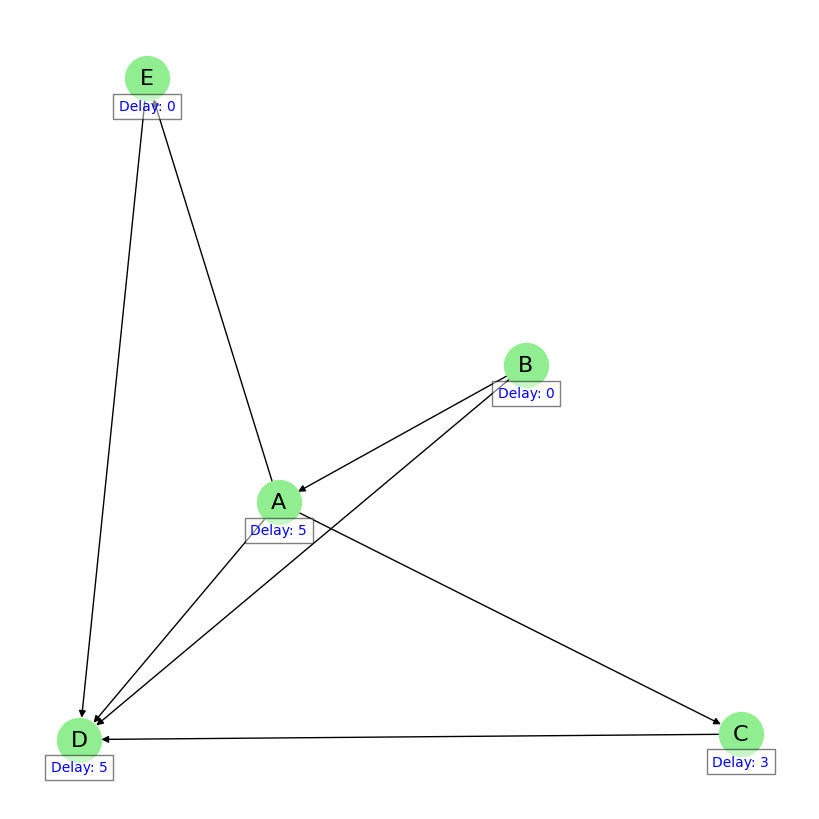

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 7 variables, 12 constraints
 ! Presolve      : 11 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 15.5 (before), 15.5 (after)
 !  . Memory usage      : 409.2 kB (before), 409.2 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          7                 -
 + New bound is 13
 *            13        1  0.01s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 13 (optimal - effective tol. is 0)
 ! Best bound             : 13
 ! -------------------------------------------------

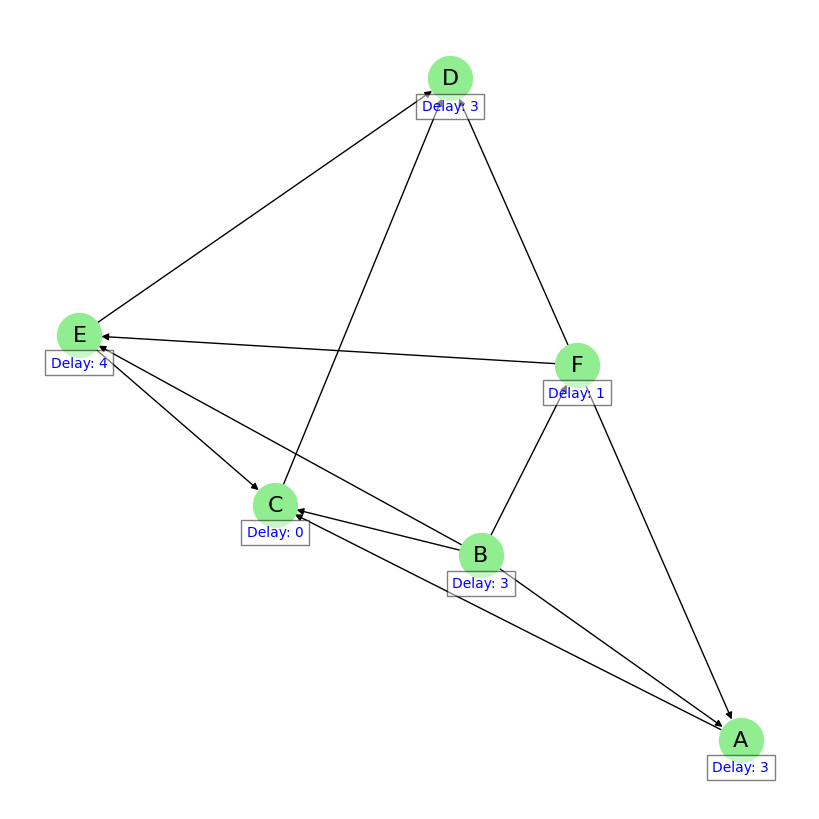

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 8 variables, 16 constraints
 ! Presolve      : 15 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 19.7 (before), 19.7 (after)
 !  . Memory usage      : 409.6 kB (before), 409.6 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          8                 -
 + New bound is 18
 *            18        3  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 18 (optimal - effective tol. is 0)
 ! Best bound             : 18
 ! -------------------------------------------------

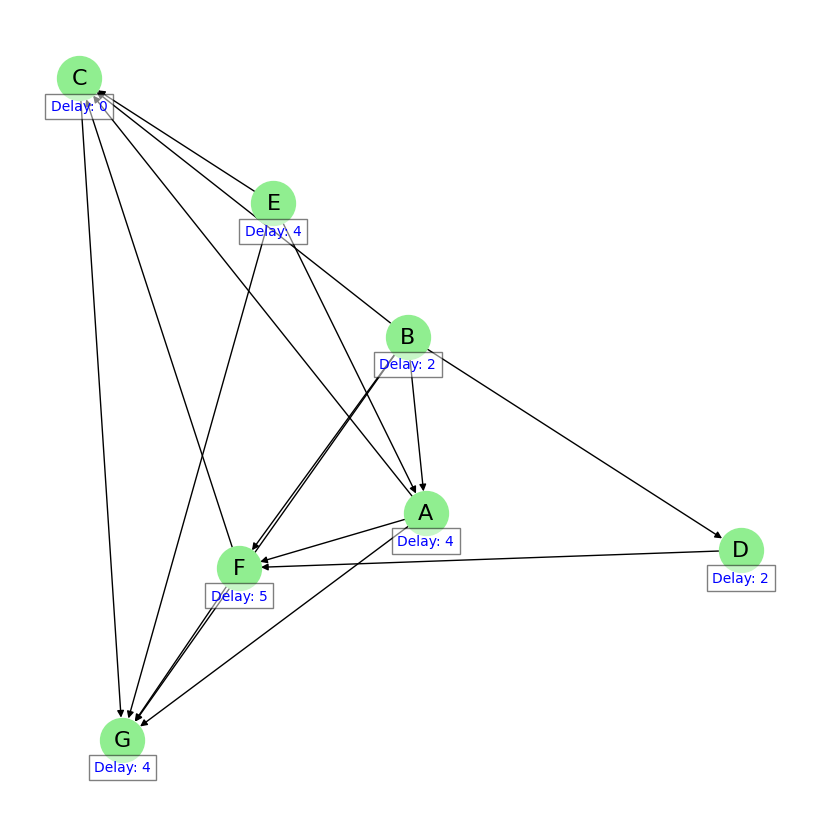

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 9 variables, 17 constraints
 ! Presolve      : 16 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 24.0 (before), 24.0 (after)
 !  . Memory usage      : 409.9 kB (before), 409.9 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          9                 -
 + New bound is 14
 *            14        3  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 14 (optimal - effective tol. is 0)
 ! Best bound             : 14
 ! -------------------------------------------------

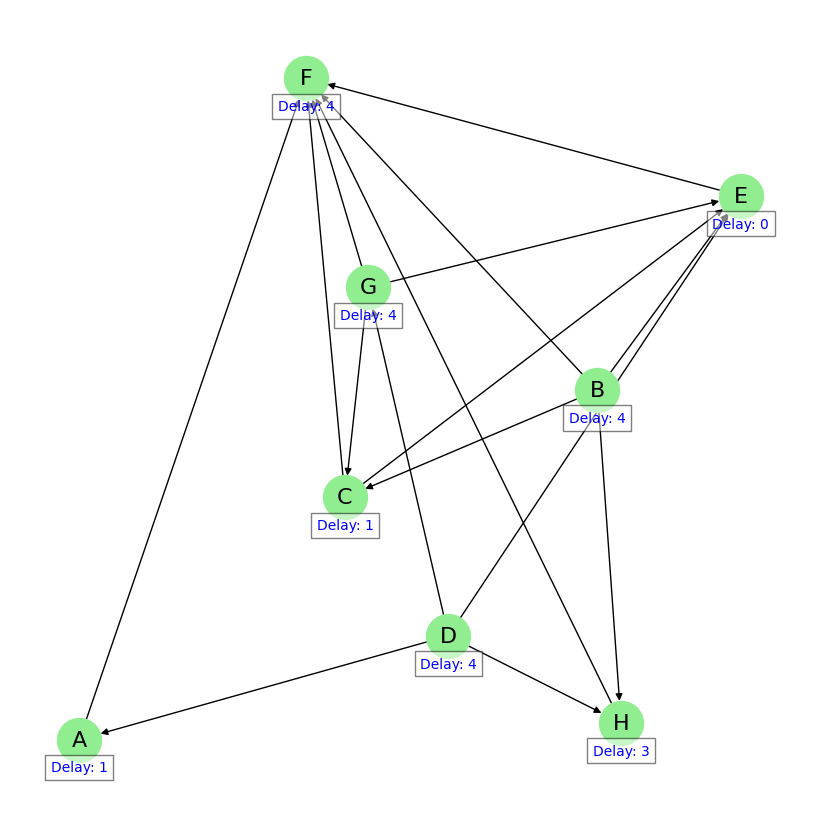

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 10 variables, 18 constraints
 ! Presolve      : 17 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 28.5 (before), 28.5 (after)
 !  . Memory usage      : 410.2 kB (before), 410.2 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         10                 -
 + New bound is 11
 *            11        2  0.00s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 11 (optimal - effective tol. is 0)
 ! Best bound             : 11
 ! ------------------------------------------------

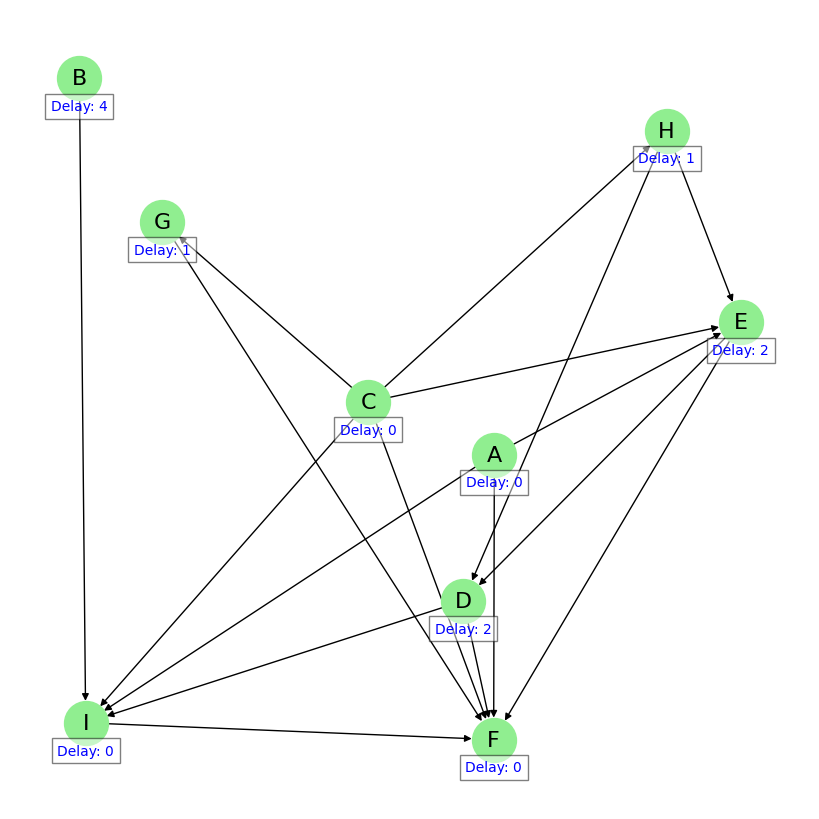

----------------------------------------------
Data saved to <_io.TextIOWrapper name='/home/pavle/Desktop/RI/RI_projekat/MPCSD/results/small_data/CP.json' mode='w' encoding='UTF-8'>


In [138]:
test_file = '/home/pavle/Desktop/RI/RI_projekat/MPCSD/test_files/small_data/'
result_file = '/home/pavle/Desktop/RI/RI_projekat/MPCSD/results/small_data/CP.json'
test_alg(test_file, result_file, CP, False)

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 21 variables, 111 constraints
 ! Presolve      : 110 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 86.4 (before), 86.4 (after)
 !  . Memory usage      : 450.2 kB (before), 450.2 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         21                 -
 + New bound is 49
 ! Using iterative diving.
 *            49        4  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 49 (optimal - effective tol. is 0)
 ! Best bound             : 49
 ! ------------------------------------------------------------------

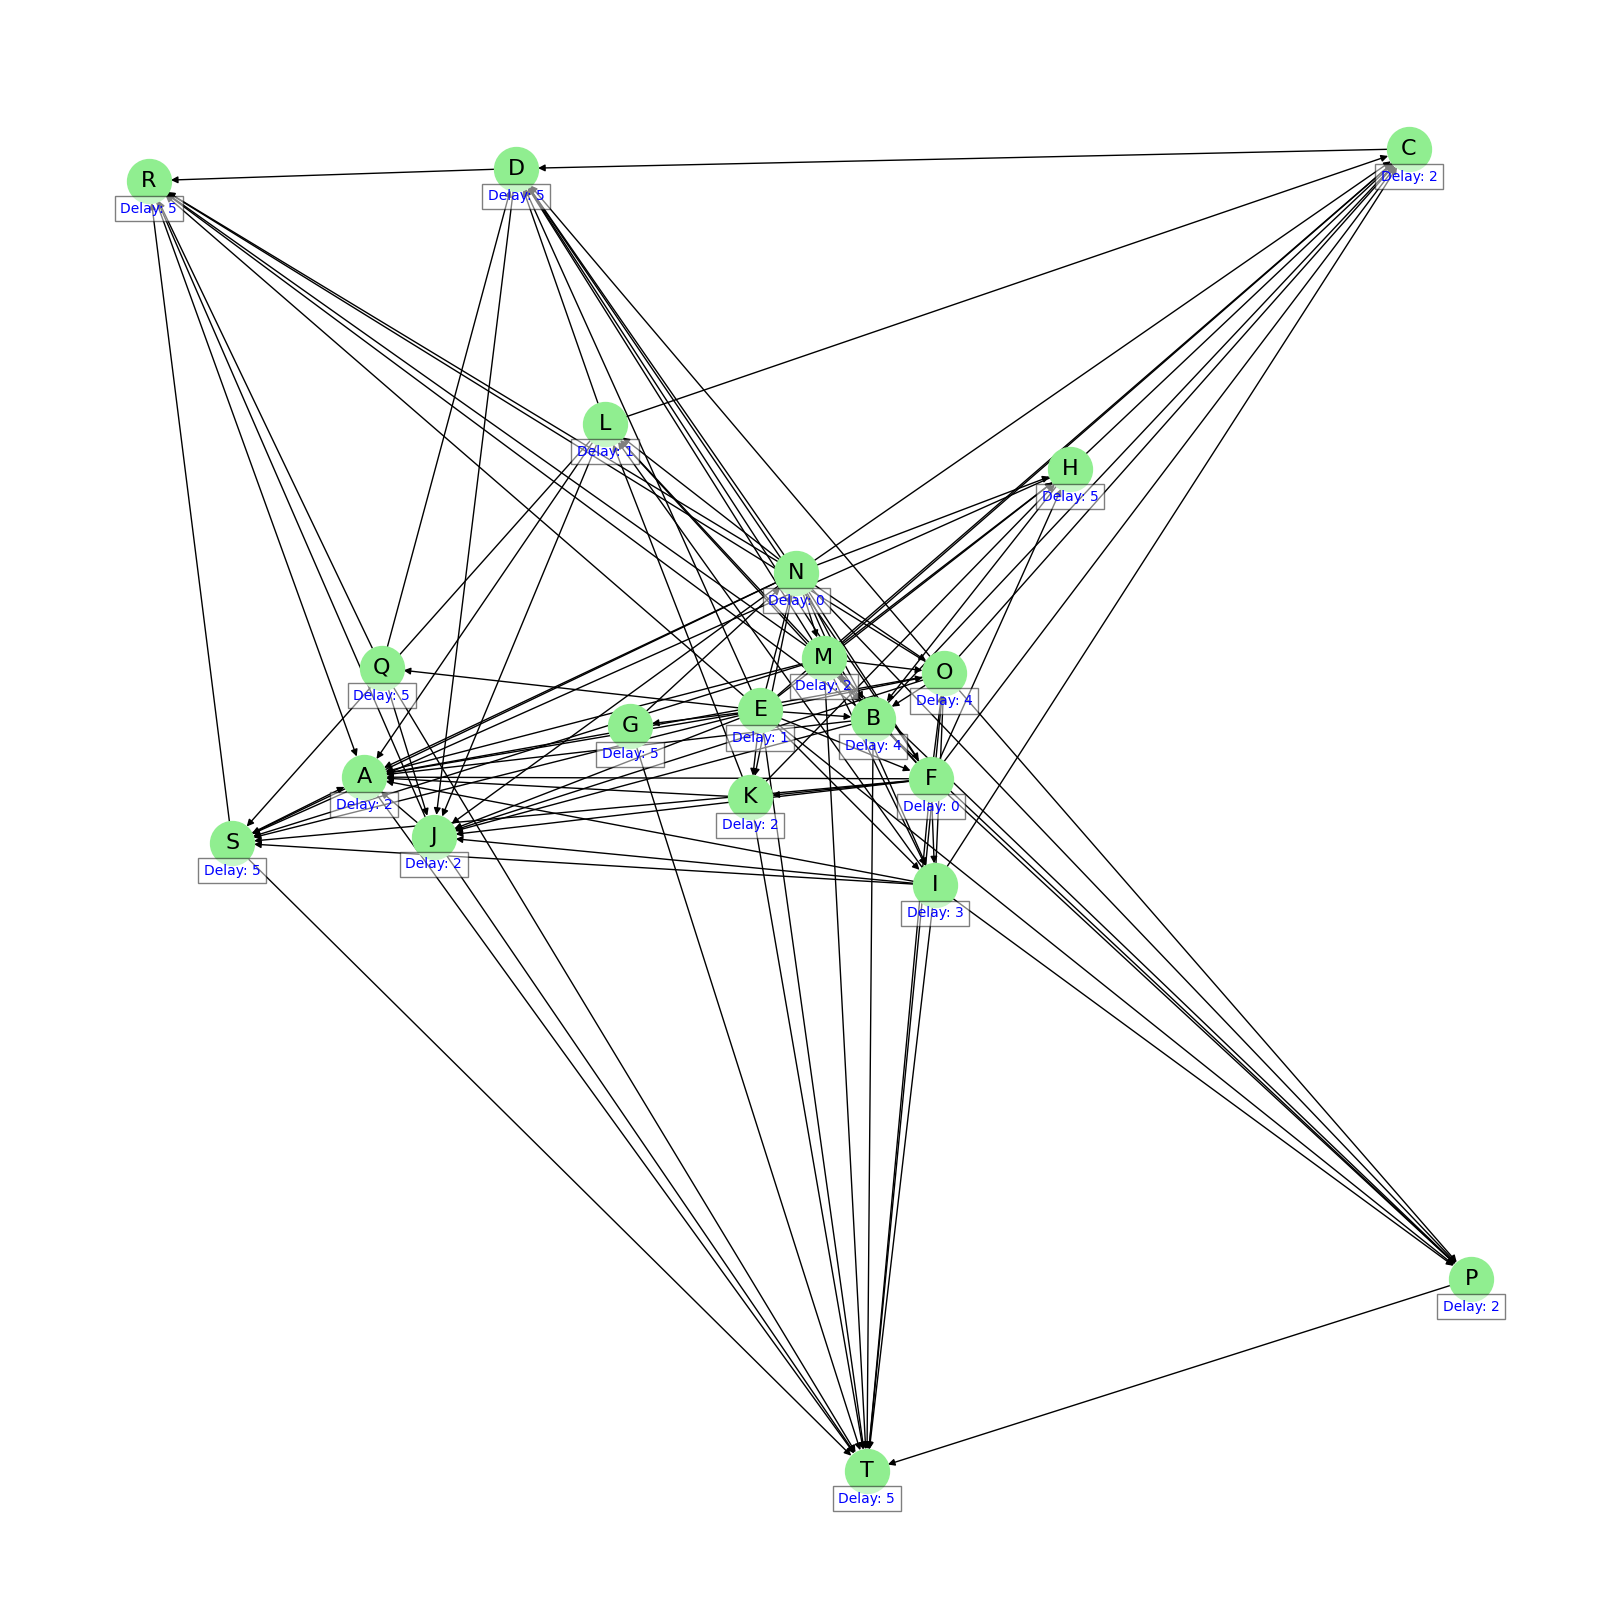

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 22 variables, 131 constraints
 ! Presolve      : 130 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 92.2 (before), 92.2 (after)
 !  . Memory usage      : 451.6 kB (before), 451.6 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         22                 -
 + New bound is 46
 ! Using iterative diving.
 *            46        7  0.02s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 46 (optimal - effective tol. is 0)
 ! Best bound             : 46
 ! -------------------

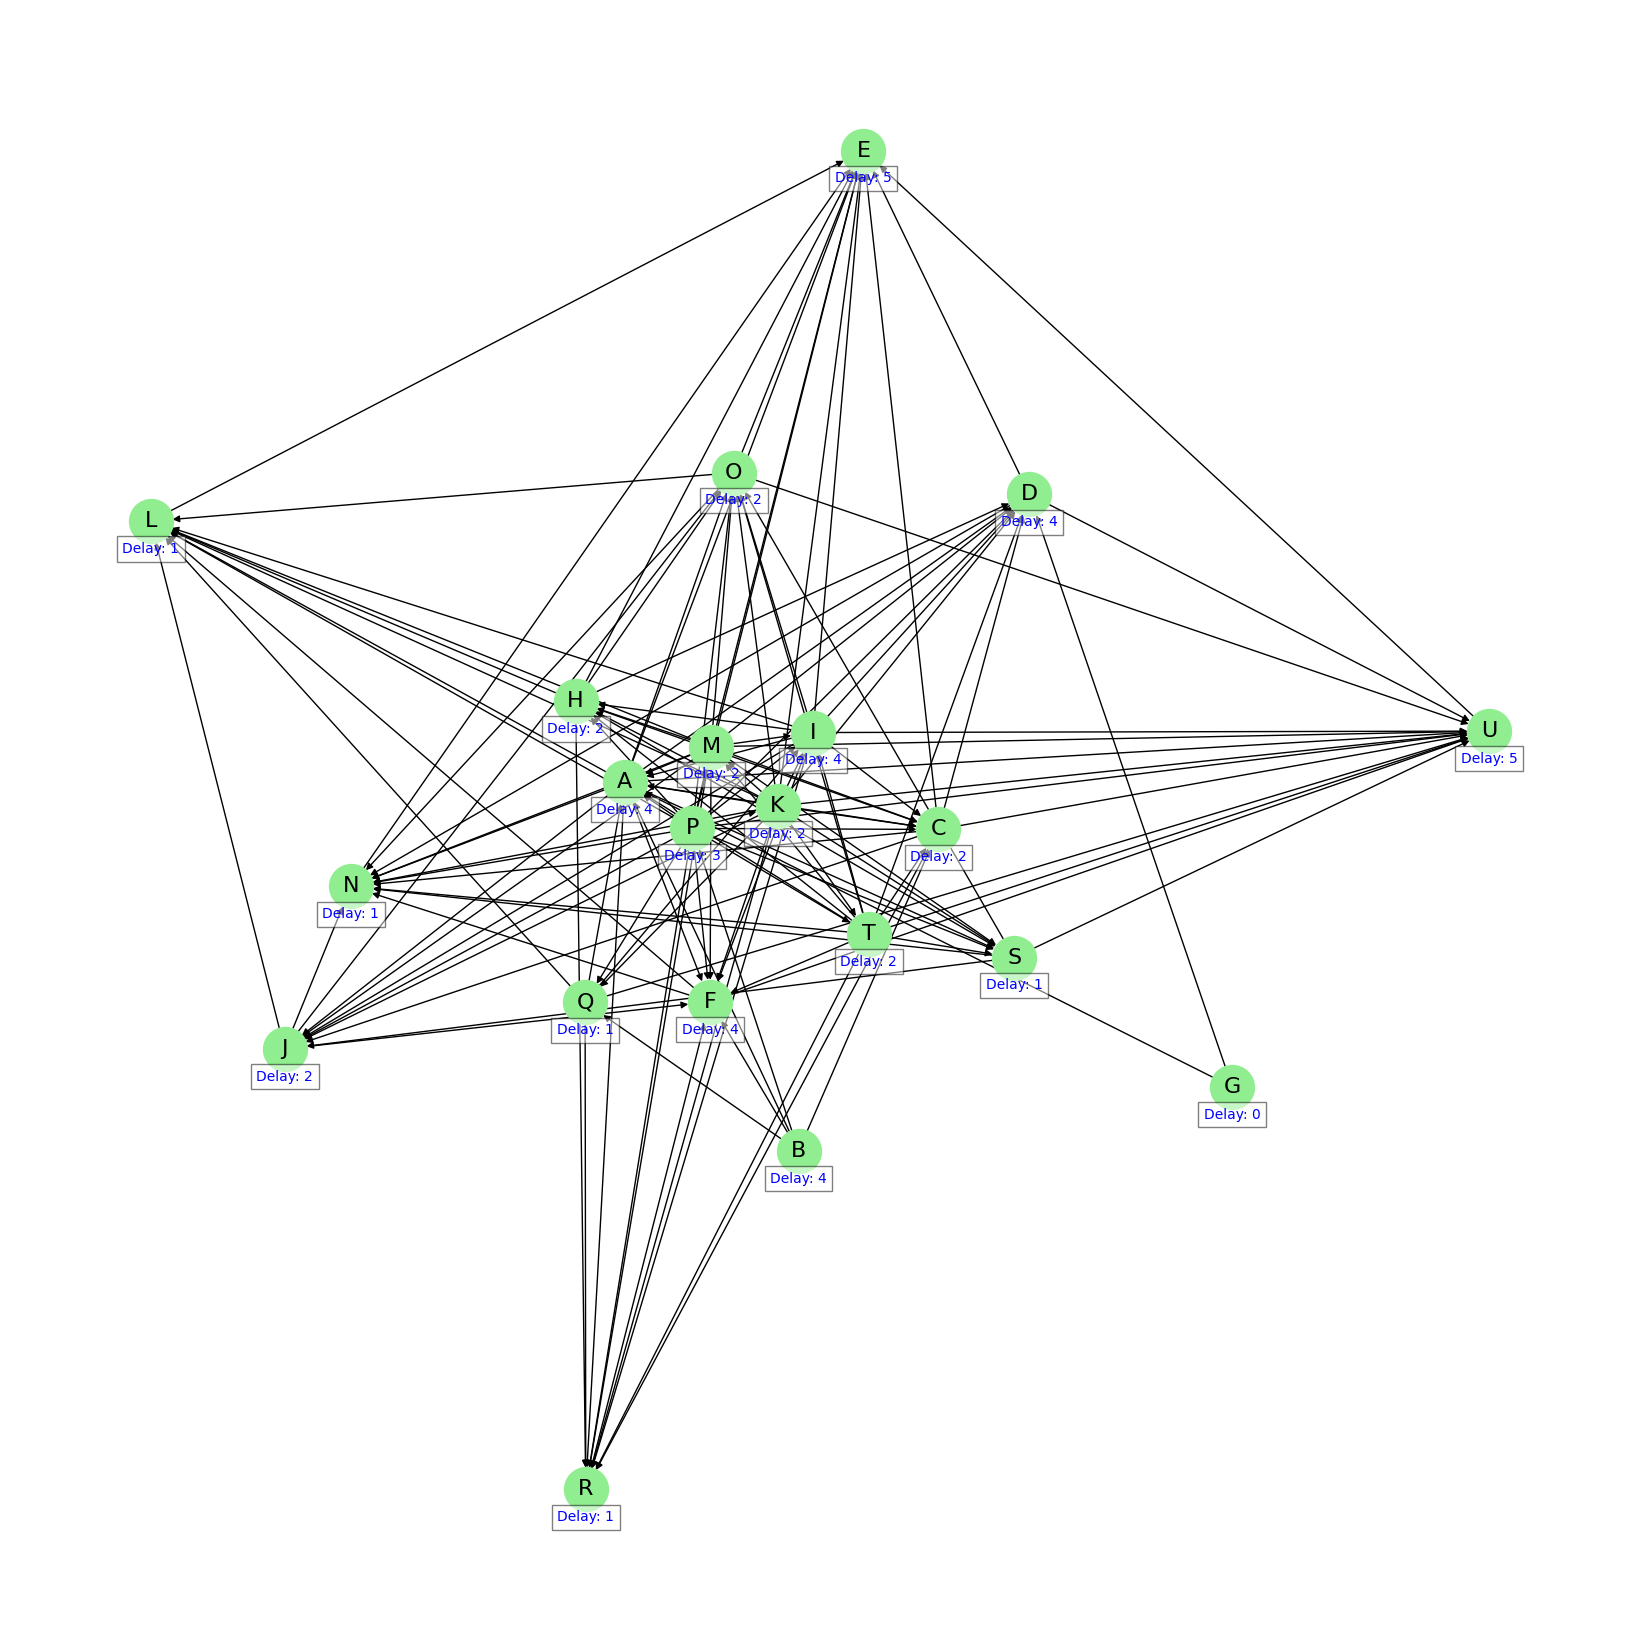

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 23 variables, 118 constraints
 ! Presolve      : 117 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 98.1 (before), 98.1 (after)
 !  . Memory usage      : 451.0 kB (before), 451.0 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         23                 -
 + New bound is 40
 ! Using iterative diving.
 *            43       45  0.01s        1      (gap is 6.98%)
 *            41       99  0.01s        1      (gap is 2.44%)
              41      100          8    1   F        -
 + New bound is 41 (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! S

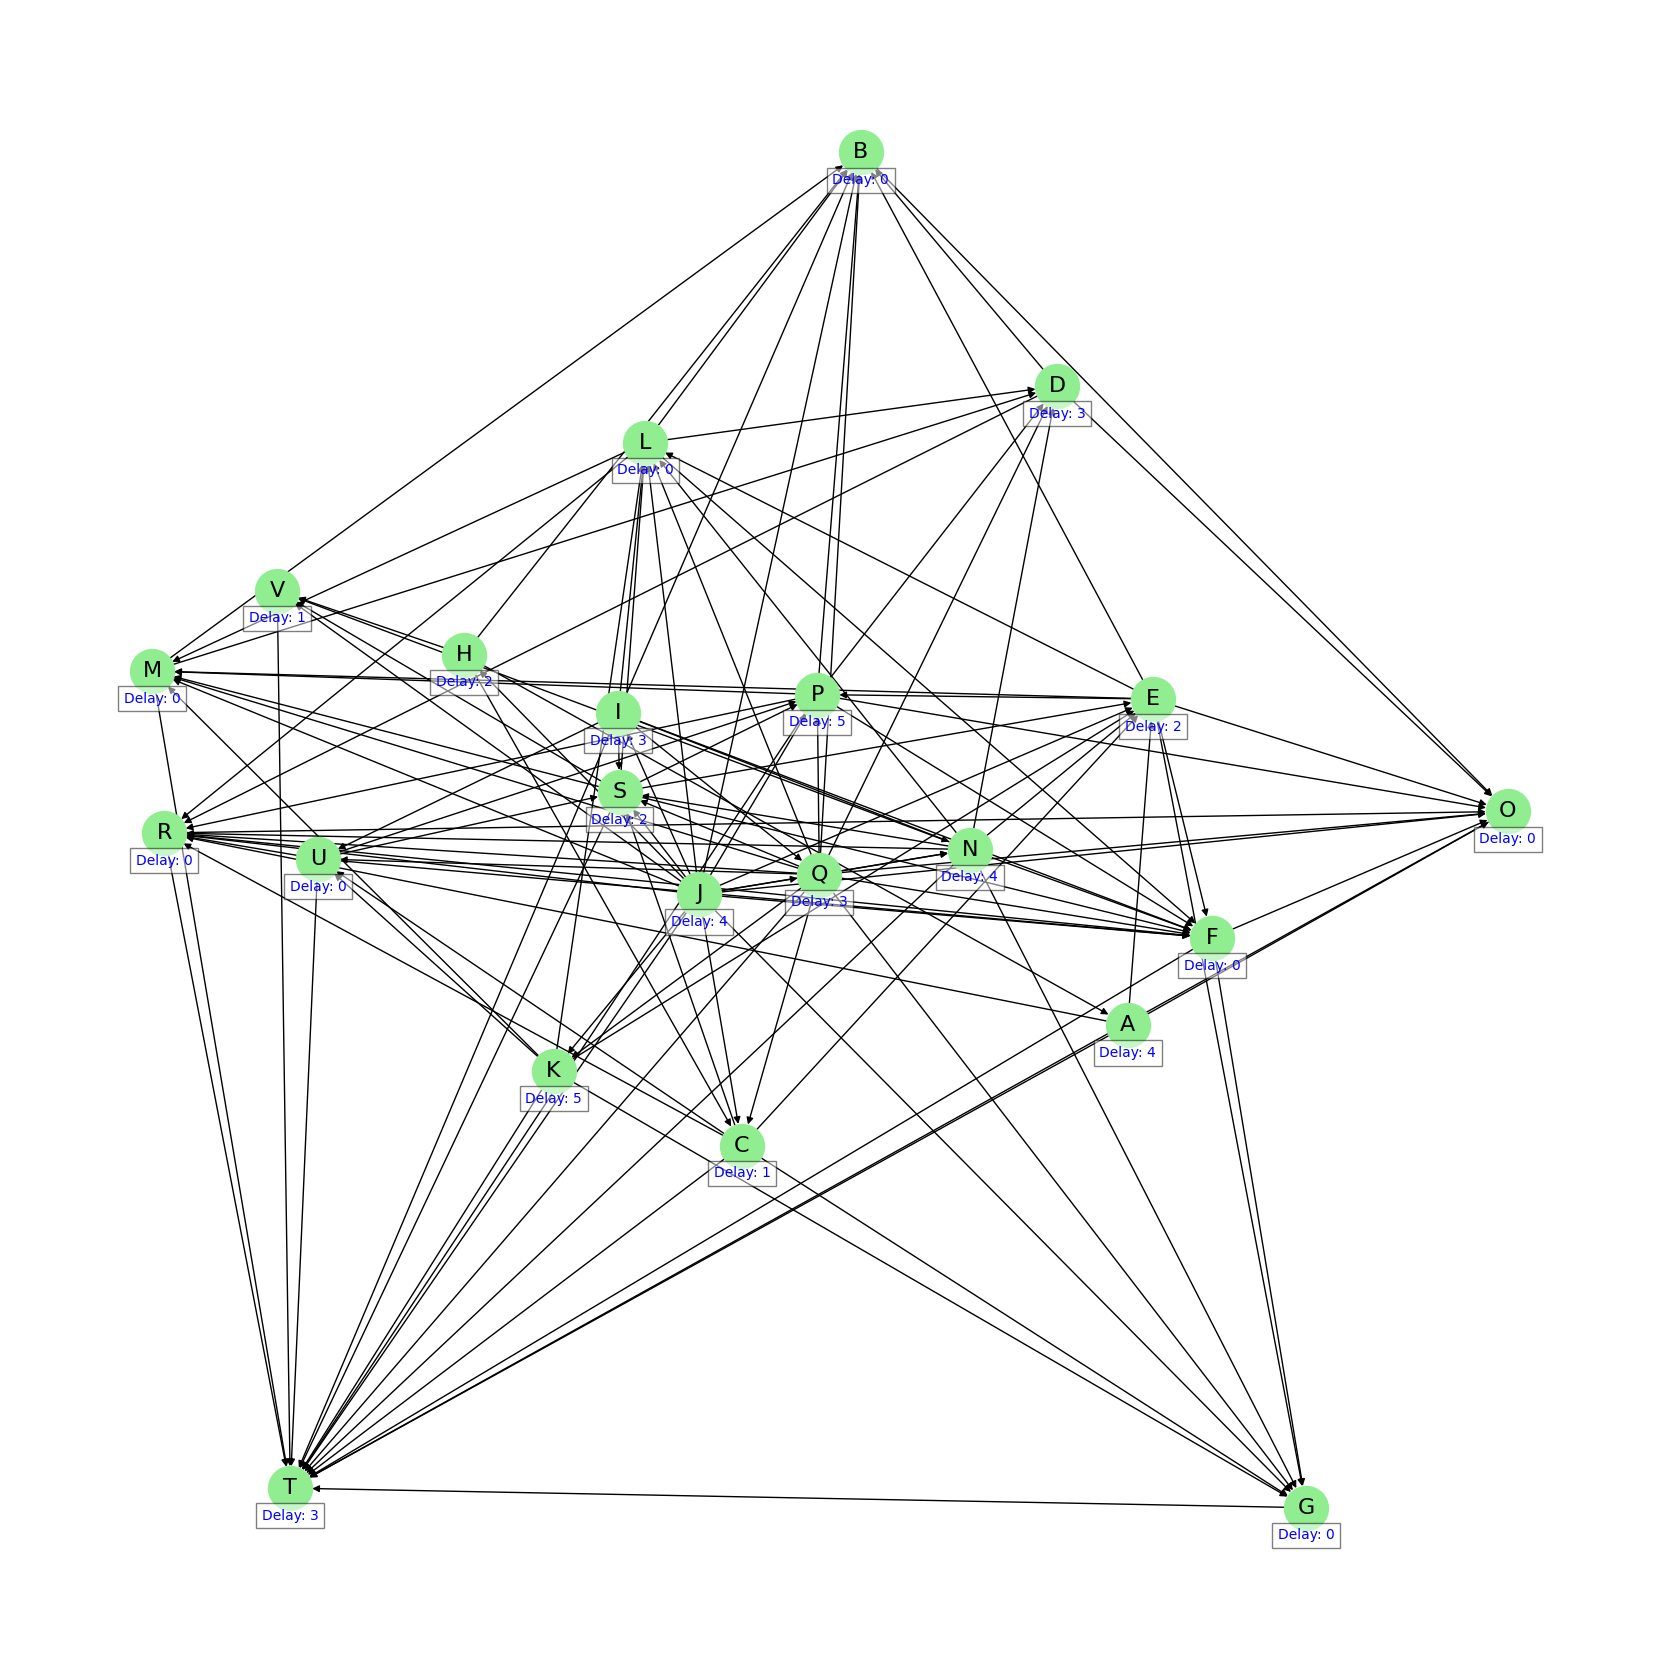

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 24 variables, 136 constraints
 ! Presolve      : 135 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 104.0 (before), 104.0 (after)
 !  . Memory usage      : 516.3 kB (before), 516.3 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         24                 -
 + New bound is 55
 ! Using iterative diving.
 *            55       10  0.01s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 55 (optimal - effective tol. is 0)
 ! Best bound             : 55
 ! -----------------

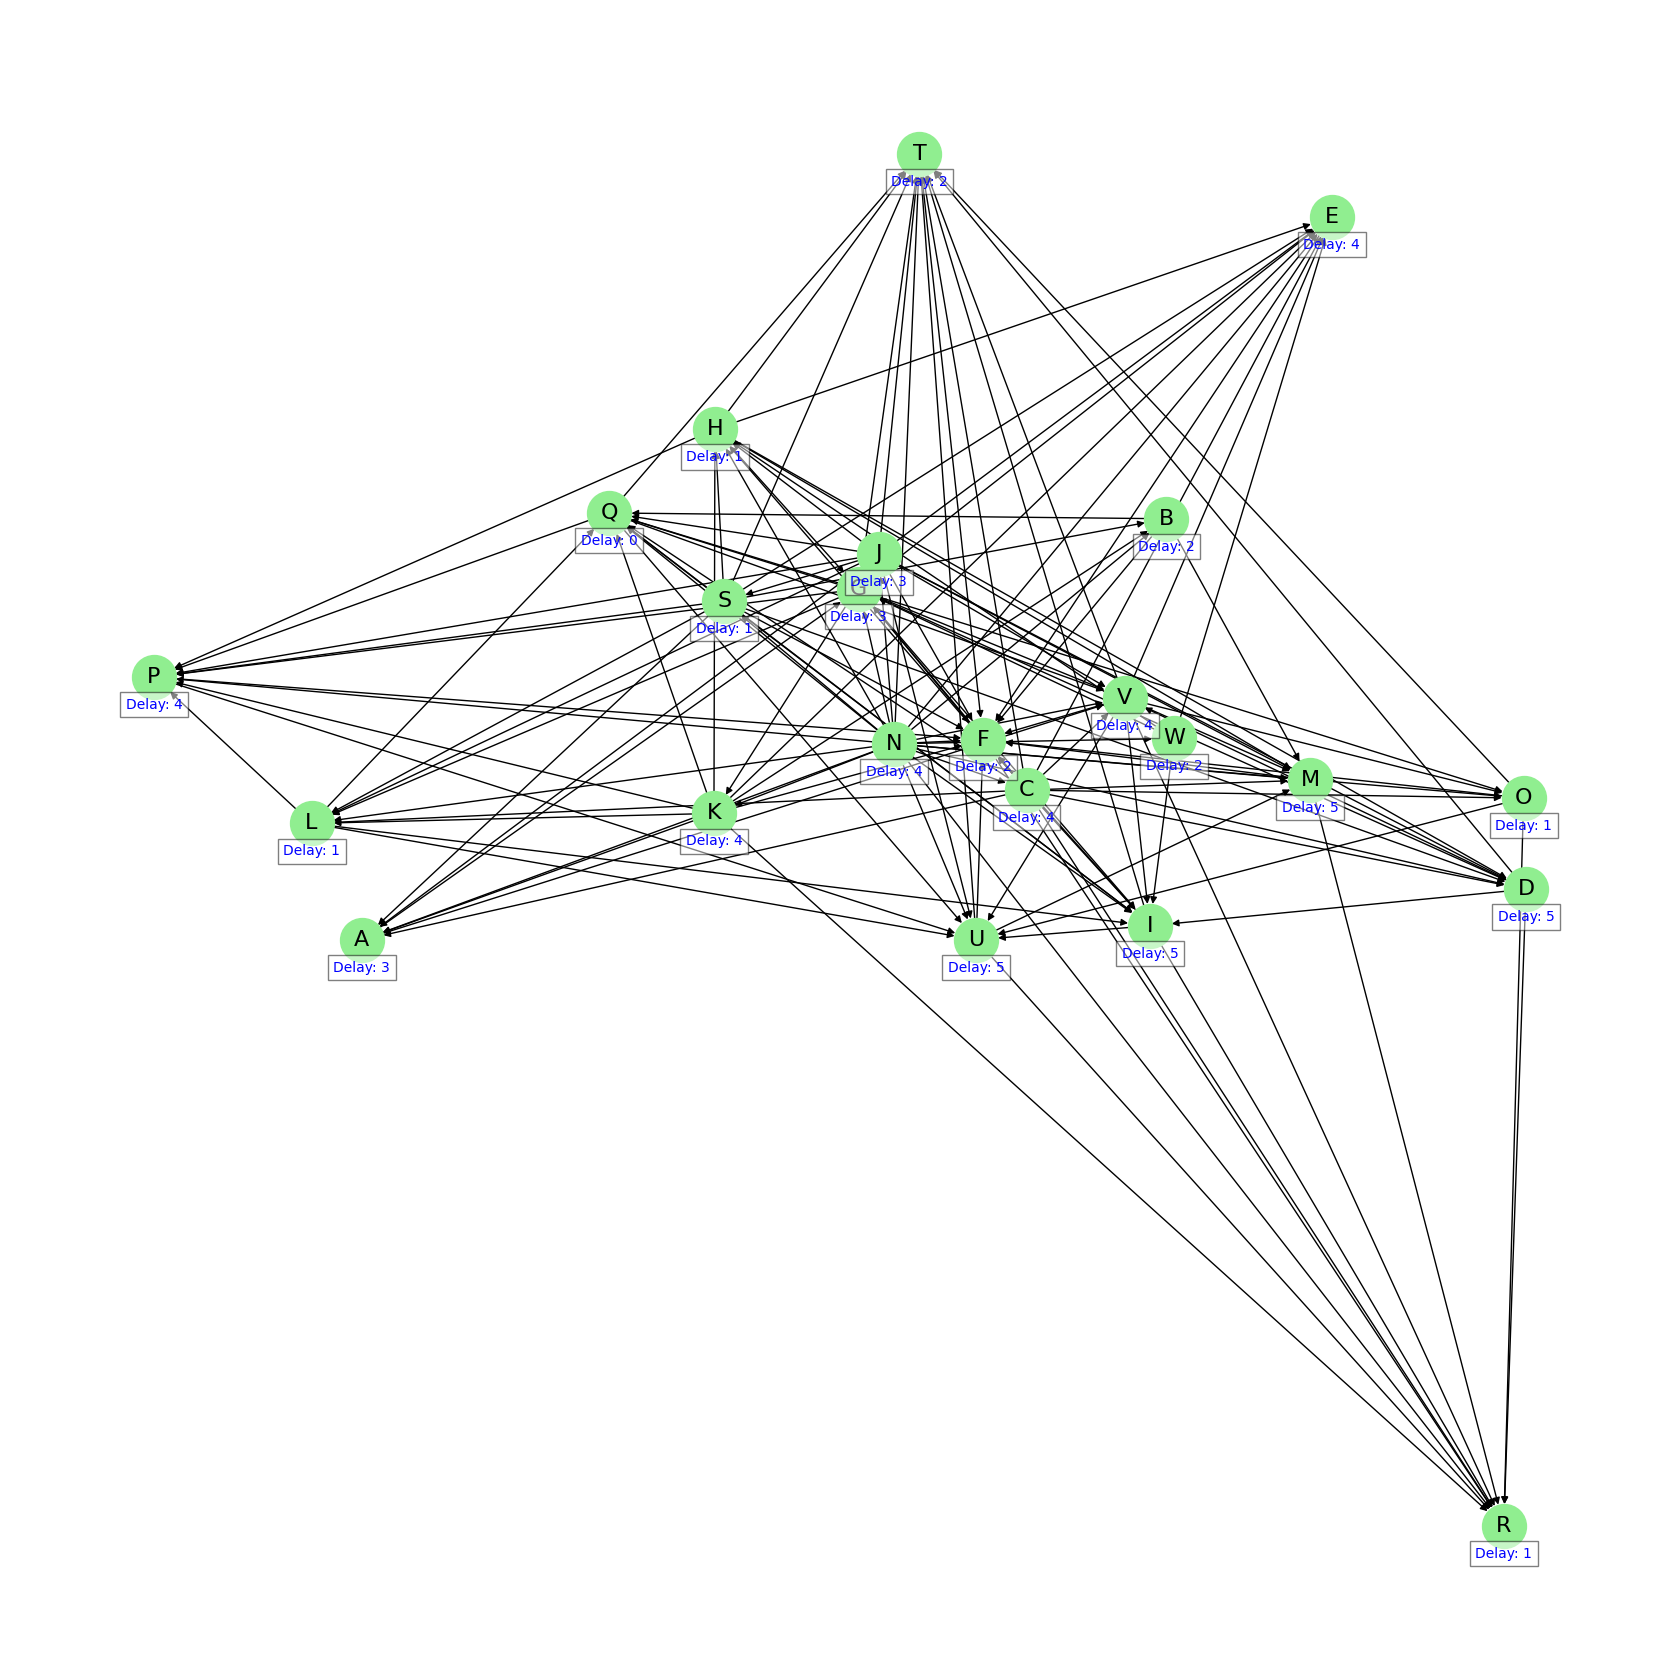

----------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 25 variables, 155 constraints
 ! Presolve      : 154 extractables eliminated
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 110.0 (before), 110.0 (after)
 !  . Memory usage      : 517.7 kB (before), 517.7 kB (after)
 ! Using parallel search with 6 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         25                 -
 + New bound is 62
 ! Using iterative diving.
 *            62        7  0.01s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 62 (optimal - effective tol. is 0)
 ! Best bound             : 62
 ! -----------------

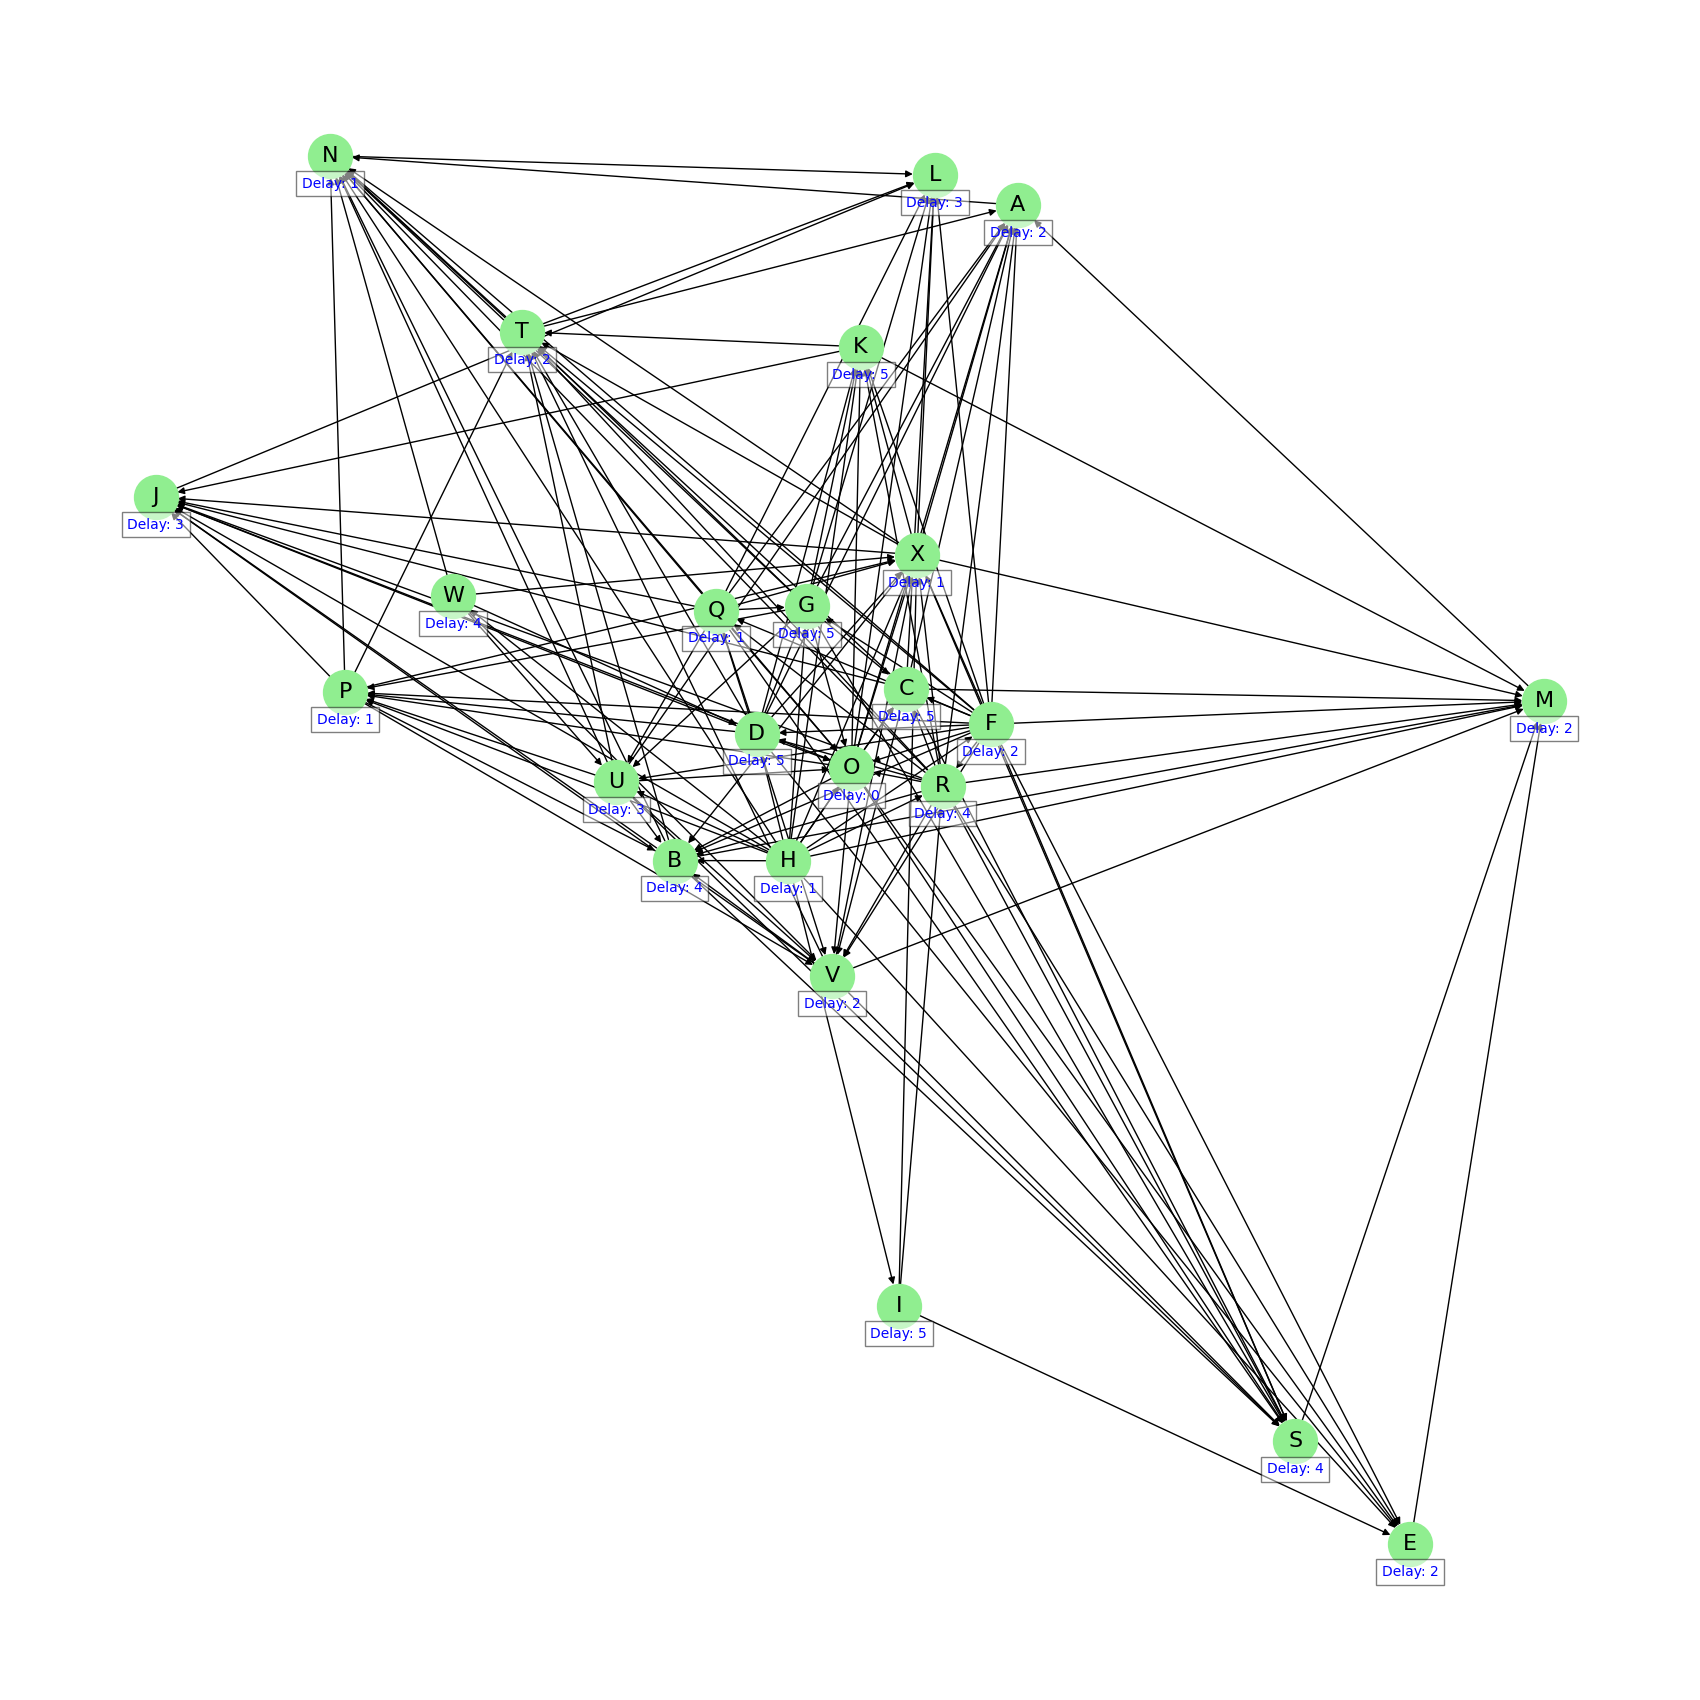

----------------------------------------------
Data saved to <_io.TextIOWrapper name='/home/pavle/Desktop/RI/RI_projekat/MPCSD/results/big_data/CP.json' mode='w' encoding='UTF-8'>


In [139]:
test_file = '/home/pavle/Desktop/RI/RI_projekat/MPCSD/test_files/big_data/'
result_file = '/home/pavle/Desktop/RI/RI_projekat/MPCSD/results/big_data/CP.json'
test_alg(test_file, result_file, CP, True)